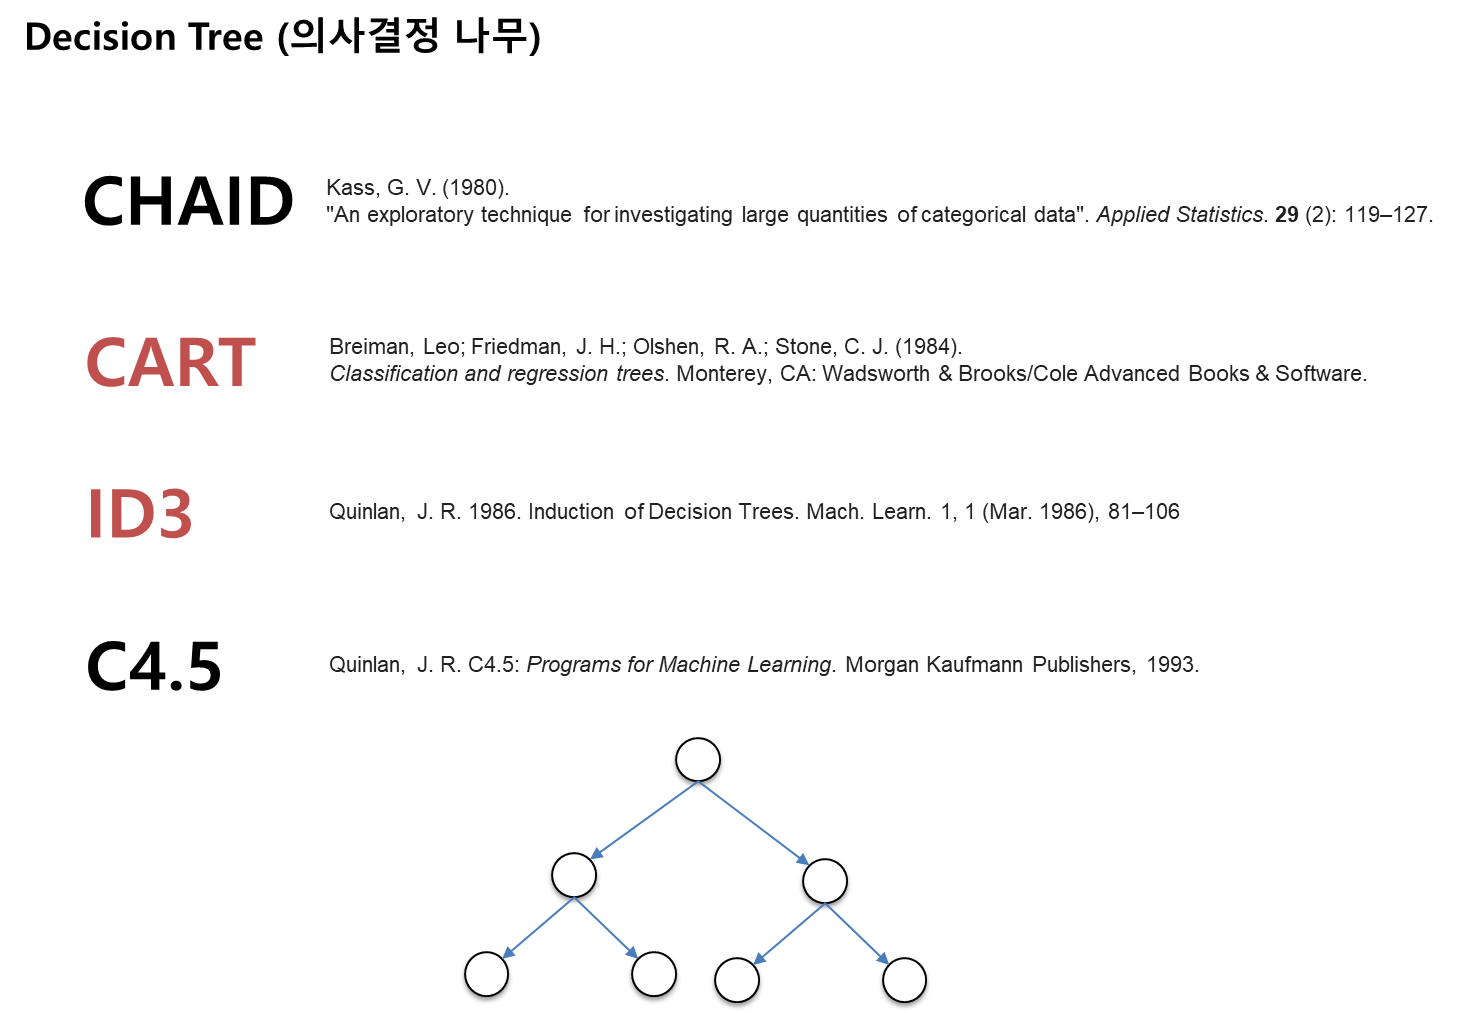


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# 1) 한글 폰트 설치 (Nanum + Noto CJK KR 백업)
!apt-get update -qq
!apt-get install -y fonts-nanum fonts-noto-cjk > /dev/null

# 2) Matplotlib에 폰트 즉시 등록(재시작 불필요) + 전역 설정
import os, glob
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 설치된 폰트 경로에서 ttf/otf 파일을 찾아 등록
font_dirs = [
    "/usr/share/fonts/truetype/nanum",
    "/usr/share/fonts/opentype/noto",
    "/usr/share/fonts/noto",
]
font_files = []
for d in font_dirs:
    if os.path.isdir(d):
        font_files += glob.glob(os.path.join(d, "**", "*.ttf"), recursive=True)
        font_files += glob.glob(os.path.join(d, "**", "*.otf"), recursive=True)

for f in font_files:
    try:
        fm.fontManager.addfont(f)
    except Exception:
        pass  # 읽지 못하는 폰트 파일은 건너뜀

# 선호 순서대로 사용할 폰트 이름 선택
preferred = [
    "NanumBarunGothic",  # 있으면 이걸 최우선
    "NanumGothic",
    "Noto Sans CJK KR",
    "Noto Sans KR",
    "NanumMyeongjo",
]
available = {f.name for f in fm.fontManager.ttflist}
font_name = next((name for name in preferred if name in available), None)

if font_name is None:
    raise RuntimeError("Korean font not found — 설치가 실패했을 수 있어요.")

mpl.rcParams["font.family"] = font_name
mpl.rcParams["axes.unicode_minus"] = False
print("Using font:", font_name)

# 3) 간단 테스트 플롯 (한글이 보이면 성공)
plt.figure()
plt.title("한글 제목 테스트 — 정상 동작하면 글자가 보입니다")
plt.plot([1, 2, 3], [1, 4, 9], marker="o")
plt.xlabel("가로축")
plt.ylabel("세로축")
plt.text(2, 7, "✅ 한글 OK, 마이너스 기호 OK: -1", ha="center")
plt.show()


# **빅밸류 플랫폼 : http://bigvalue.ai**

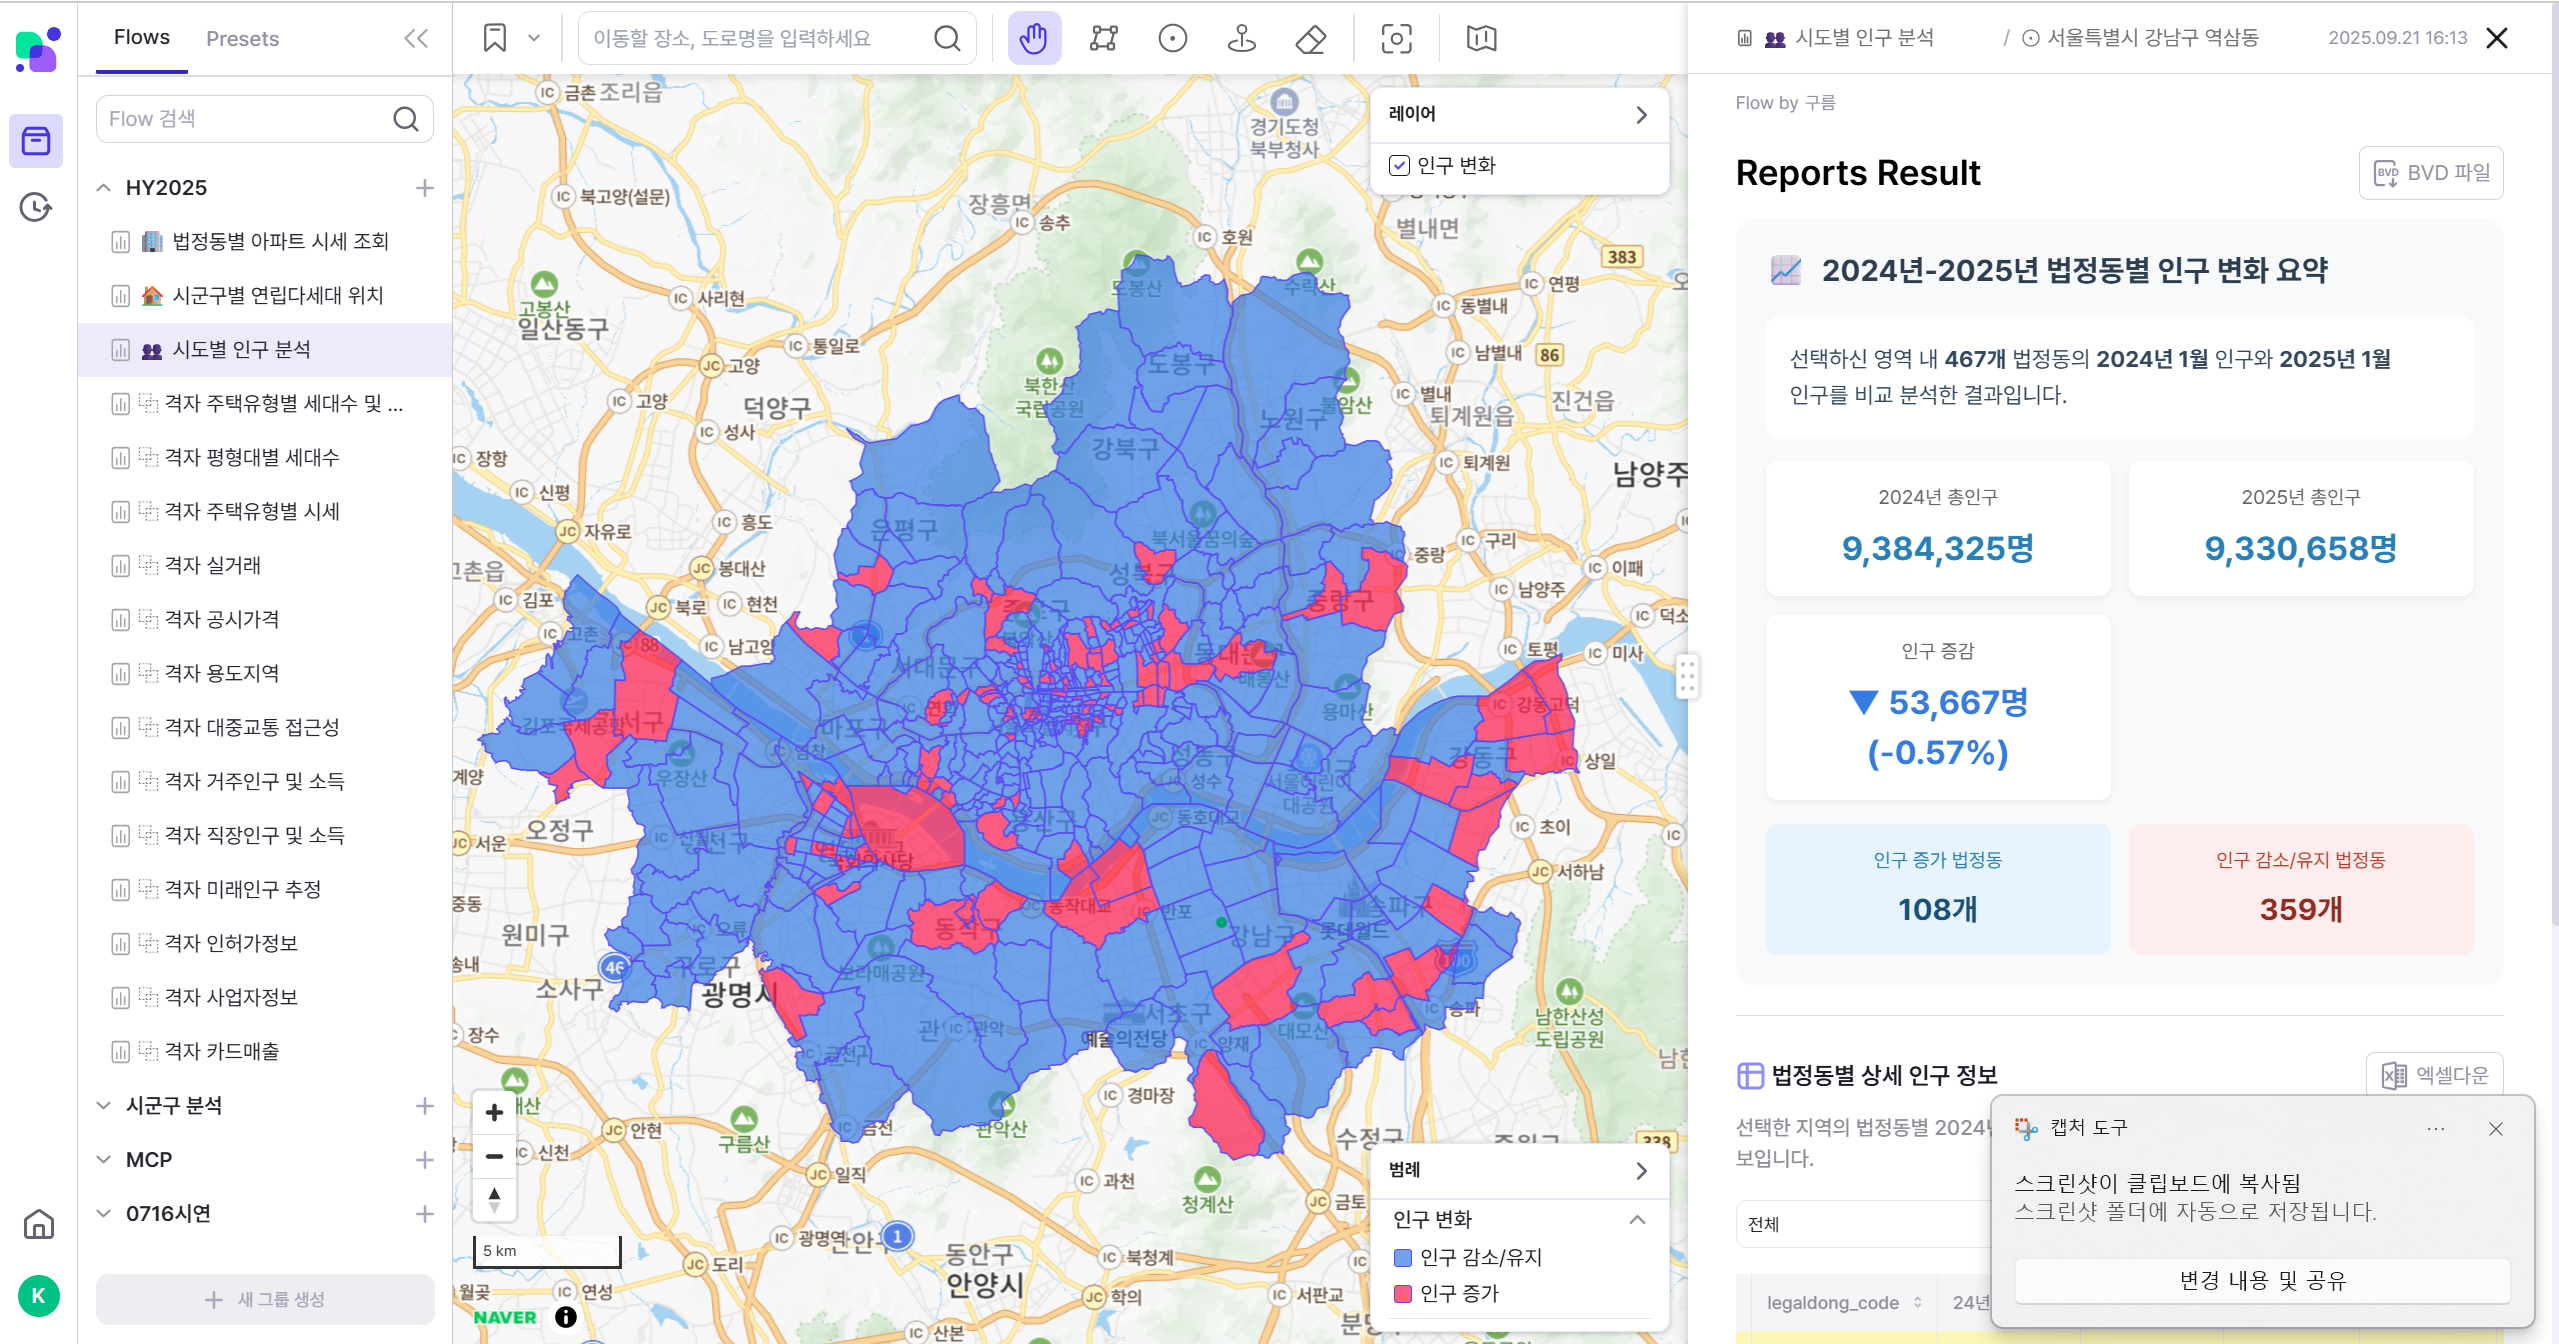

In [ ]:
!wget "https://hycms.hanyang.ac.kr/index.php?module=xn_media_content2013&act=dispXn_media_content2013DownloadContent&content_id=68cfa2c578967" -O "data.xlsx"

In [ ]:
"""학습용 데이터셋을 불러옴"""
data = pd.read_excel("data.xlsx", dtype='str')
data.head(10)

In [ ]:
data.columns.values

In [ ]:
int_cols = ['24년 총인구',
       '25년 총인구', '남성 총인구', '여성 총인구', '전체 0대', '전체 10대', '전체 20대',
       '전체 30대', '전체 40대', '전체 50대', '전체 60대', '전체 70대', '전체 80대',
       '전체 90대', '전체 100세 이상', '남성 0대', '남성 10대', '남성 20대', '남성 30대',
       '남성 40대', '남성 50대', '남성 60대', '남성 70대', '남성 80대', '남성 90대',
       '남성 100세 이상', '여성 0대', '여성 10대', '여성 20대', '여성 30대', '여성 40대',
       '여성 50대', '여성 60대', '여성 70대', '여성 80대', '여성 90대', '여성 100세 이상']

data[int_cols] = data[int_cols].astype('int')

data.dtypes

In [ ]:
data['인구증감'] = data.apply(lambda row: 0 if row['24년 총인구'] >= row['25년 총인구'] else 1, axis=1)
display(data.head())

In [ ]:
""" plot으로 인구증감 그룹을 남성 총인구와 여성 총인구로 2차원에 표시"""
tmp = data[['남성 총인구', '여성 총인구', '인구증감']]

""" plot으로 인구증감 그룹을 2차원에 표시"""
x1 = np.array(tmp[tmp['인구증감'] == 1][['남성 총인구', '여성 총인구']].values)
y1 = np.array(tmp[tmp['인구증감'] == 1]['인구증감'].values)
y1 = y1.reshape(y1.shape[0], 1)

x2 = np.array(tmp[tmp['인구증감'] == 0][['남성 총인구', '여성 총인구']].values)
y2 = np.array(tmp[tmp['인구증감'] == 0]['인구증감'].values)
y2 = y2.reshape(y2.shape[0], 1)


plt.figure(figsize=(9, 9))
plt.scatter(x=x1[:,0], y=x1[:,1], marker='x', color='red', label='인구증가')
plt.scatter(x=x2[:,0], y=x2[:,1], marker='o', color='blue', label='인구감소')
plt.legend(fontsize=10)
plt.xlabel('남성 총인구')
plt.ylabel('여성 총인구')
plt.title('인구증감에 따른 남성/여성 총인구 분포')
plt.show()

# **GiniIndex 계산**

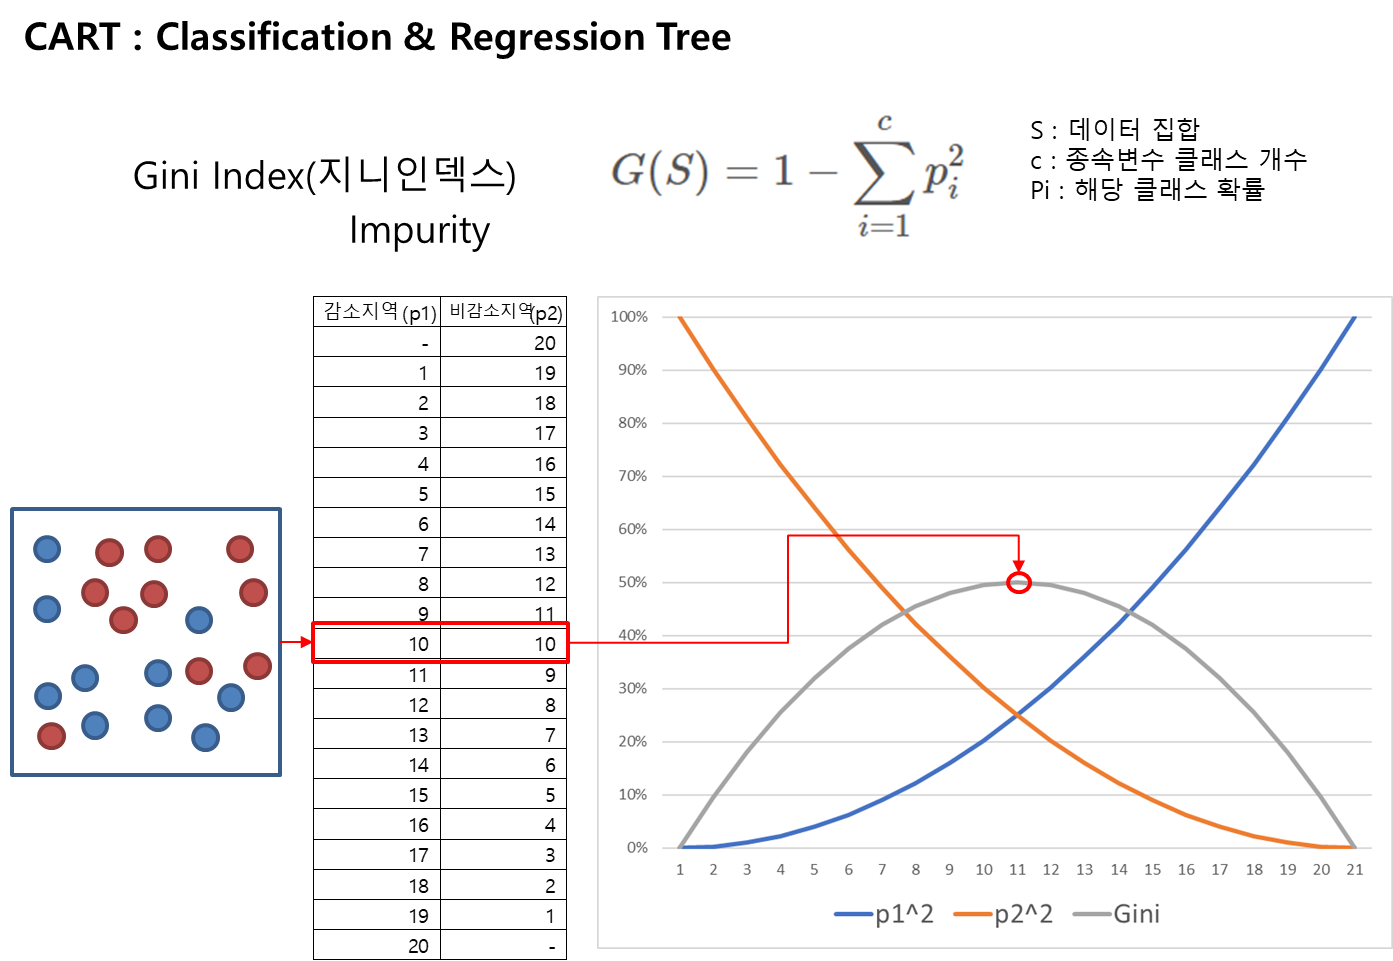

In [ ]:
#%%
tmp = data[['남성 총인구', '여성 총인구', '인구증감']]


"""학습을 위하 pandas를 numpy로 변환하여 x와 y 배열 생성"""
x = np.array(tmp[['남성 총인구', '여성 총인구']].values)
y = np.array(tmp['인구증감'].values)
y = y.reshape(y.shape[0], 1) #x배열과 shape를 같게 reshape

print(x.shape)
print(y.shape)

In [ ]:
"""지니인덱스 계산 함수"""
def GiniIndex(y):
    total = len(y)
    G = 1
    for c in np.unique(y): #종속변수의 갯수로 loop
        # print(str(c) + "값 : " + str(np.power(np.where(y == c, 1, 0).sum() / total, 2)))
        G = G - np.power(np.where(y == c, 1, 0).sum() / total, 2)
    return G

In [ ]:
# prompt: (120,1) shape의 0과 1로 구성된 numpy값을 전달하면 giniindex를 계산하는 과정을 출력하는 함수 생성

def calculate_gini_index_with_process(y):
  """
  (120,1) shape의 0과 1로 구성된 numpy값을 전달하면 giniindex를 계산하는 과정을 출력하는 함수

  Args:
      y: (120, 1) shape의 0과 1로 구성된 numpy 배열

  Returns:
      None
  """
  total = len(y)
  G = 1
  print("Initial Gini Index:", G)
  for c in np.unique(y):
    count_c = np.where(y == c, 1, 0).sum()
    probability_c = count_c / total
    print(f"Class {c}: Count = {count_c}, Probability = {probability_c}")
    G = G - np.power(probability_c, 2)
    print(f"Gini Index after considering class {c}: {G}")
  print("Final Gini Index:", G)



In [ ]:
calculate_gini_index_with_process(y)

In [ ]:
GiniIndex(y)

# **최적의 분할 기준 정하기**

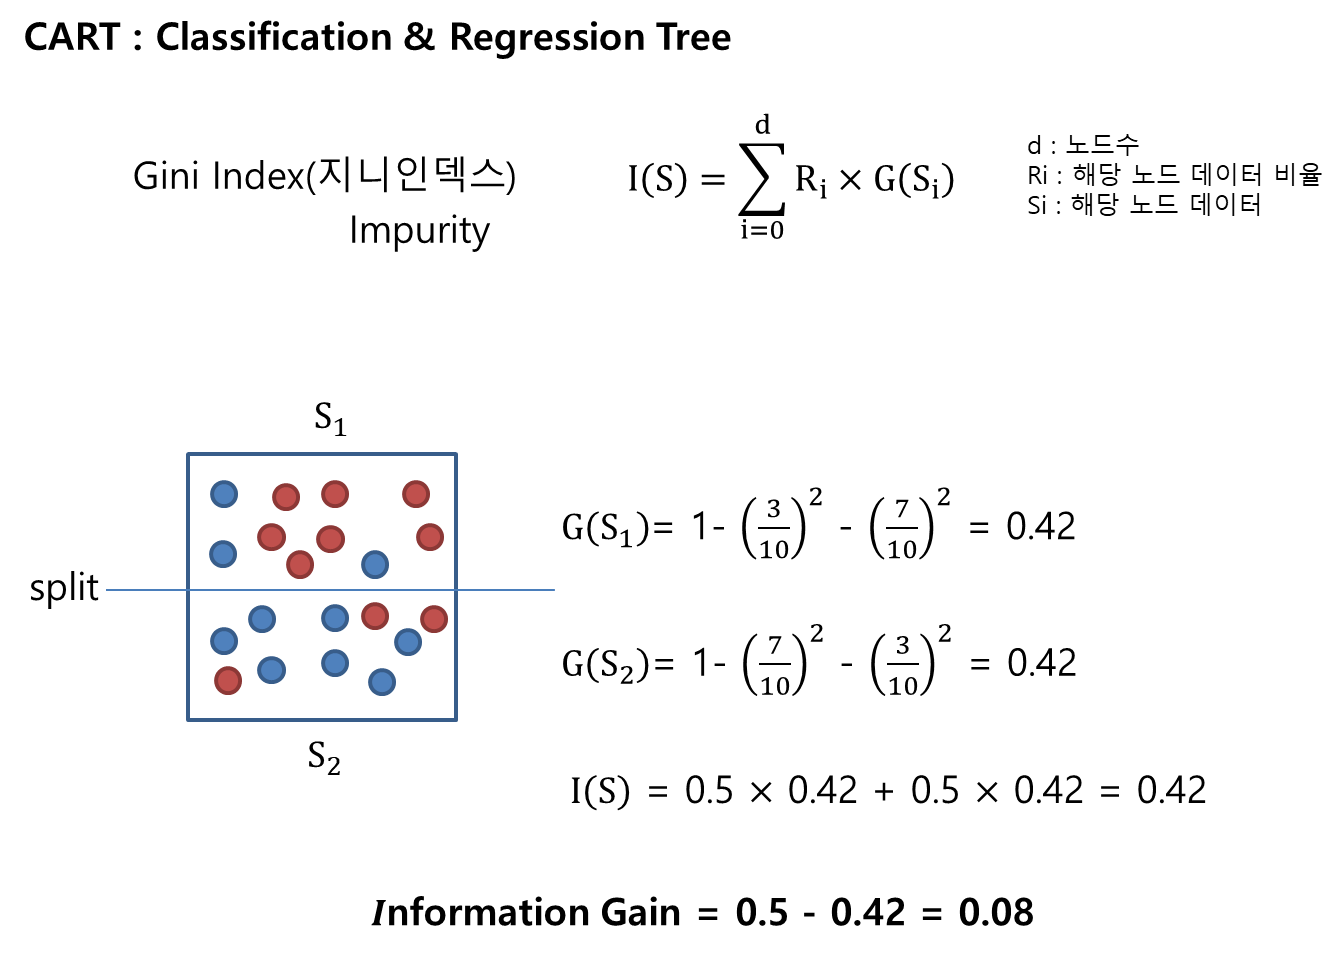

In [ ]:

"""입력변수를 정렬한 후 모든 구간에서 잘라서 giniindex를 계산하여 출력 """

criteria = x[:,0]
criteria = np.sort(np.unique(criteria))
total = len(y)
I = np.array([])
for f,l in zip(criteria[:-1], criteria[1:]):
    split = np.mean([f, l])

    s1 = y[np.where(x[:,0] < split, True, False)]
    s2 = y[np.where(x[:,0] > split, True, False)]

    Gini = len(s1) / total *  GiniIndex(s1) + len(s2) / total * GiniIndex(s2)

    I = np.append(I, np.array([f, l, split, Gini]))

I = I.reshape(int(I.shape[0]/4), 4)


plt.figure(figsize=(15, 7))
plt.title('남성 총인구')
plt.scatter(x=I[:,2], y=I[:,3],  marker='o', color='grey', label='Gini')
plt.show()

In [ ]:

#%%
""" 분할 지니인덱스 계산을 함수로 변환하여 모든 입력 변수에 대해서 계산하여 출력"""
def split_loop(x,y):
    criteria = x
    criteria = np.sort(np.unique(criteria))
    total = len(y)
    I = np.array([])
    for f,l in zip(criteria[:-1], criteria[1:]):
        split = np.mean([f, l])

        s1 = y[np.where(x < split, True, False)]
        s2 = y[np.where(x > split, True, False)]

        Gini = len(s1) / total *  GiniIndex(s1) + len(s2) / total * GiniIndex(s2)

        I = np.append(I, np.array([f, l, split, Gini]))

    I = I.reshape(int(I.shape[0]/4), 4)
    return I

I1 = split_loop(x[:,0], y)
I2 = split_loop(x[:,1], y)

plt.figure(figsize=(15, 7))
ax1 = plt.subplot()
ax2 = ax1.twiny()

ax1.scatter(x=I1[:,2], y=I1[:,3],  marker='o', color='blue', label='남성 총인구')
ax2.scatter(x=I2[:,2], y=I2[:,3],  marker='x', color='red', label='여성 총인구')

ax1.legend(fontsize=10)
ax2.legend(fontsize=10)
plt.show()

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import classification_report, confusion_matrix

tree_clf = DecisionTreeClassifier(max_depth=1)
tree_clf.fit(x,y)

score_tr = tree_clf.score(x, y)


dt_dot_data  = export_graphviz(tree_clf,
                               feature_names=['남성 총인구', '여성 총인구'],
                               class_names=['감소', '증가'],         # 종속변수
                               rounded = True,
                               filled = True)

graph = Source(dt_dot_data)
display(graph)

In [ ]:

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(x,y)

score_tr = tree_clf.score(x, y)


dt_dot_data  = export_graphviz(tree_clf,
                               feature_names=['남성 총인구', '여성 총 인구'],
                               class_names=['감소', '증가'],         # 종속변수
                               rounded = True,
                               filled = True)

graph = Source(dt_dot_data)
display(graph)

In [ ]:

tree_clf = DecisionTreeClassifier(max_depth=10)
tree_clf.fit(x,y)

score_tr = tree_clf.score(x, y)


dt_dot_data  = export_graphviz(tree_clf,
                               feature_names=['남성 총인구', '여성 총인구'],
                               class_names=['감소', '증가'],         # 종속변수
                               rounded = True,
                               filled = True)

graph = Source(dt_dot_data)
display(graph)

In [ ]:

"""변수중요도"""
feature_imp = tree_clf.feature_importances_
n_feature = len(['남성 총인구', '여성 총인구'])
idx = np.arange(n_feature)

plt.figure(figsize=(5, 1))
plt.barh(idx, feature_imp, align='center')
plt.yticks(idx, ['남성 총인구', '여성 총인구'])
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
for i, fi in zip(idx, feature_imp):
    plt.text(0.5, i,'%s' %fi, va='center', ha='center')
plt.show()

In [ ]:
# prompt: Dtree 로 분석한 tree_clf의 변수 중요도가 각 depth를 통과하면서 어떻게 변화하는지 보여줘

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import classification_report, confusion_matrix

# 변수 중요도 변화 확인을 위한 함수 정의
def analyze_feature_importance_by_depth(x, y, max_depth):
  feature_importance_by_depth = []
  for depth in range(1, max_depth + 1):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(x, y)
    feature_importance_by_depth.append(tree_clf.feature_importances_)
  return feature_importance_by_depth

# 변수 중요도 분석 실행
feature_importance_by_depth = analyze_feature_importance_by_depth(x, y, 10)

# 결과 시각화
plt.figure(figsize=(10, 6))
depths = range(1, 11)
for i, feature_importance in enumerate(feature_importance_by_depth):
  plt.plot(depths[i], feature_importance[0], 'bo', label='남성 총인구' if i == 0 else None)
  plt.plot(depths[i], feature_importance[1], 'ro', label='여성 총인구' if i == 0 else None)

plt.xlabel('Depth')
plt.ylabel('Feature Importance')
plt.title('Feature Importance 변화 (Depth에 따른)')
plt.legend()
plt.show()



In [ ]:
# prompt: Dtree 로 분석한 tree_clf가 depth가 증가할수록 정확도가 어떻게 증가하는지 보여줘

from sklearn.model_selection import train_test_split

# 데이터를 학습 데이터와 테스트 데이터로 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 최대 깊이를 바꿔가면서 의사결정 트리를 학습하고 정확도를 측정
train_accuracies = []
test_accuracies = []
max_depths = range(1, 11)  # 1부터 10까지의 깊이를 확인

for depth in max_depths:
  tree_clf = DecisionTreeClassifier(max_depth=depth)
  tree_clf.fit(x_train, y_train)
  train_accuracy = tree_clf.score(x_train, y_train)
  test_accuracy = tree_clf.score(x_test, y_test)
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)


# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, 'bo-', label='Train Accuracy')
plt.plot(max_depths, test_accuracies, 'ro-', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy 변화 (Depth에 따른)')
plt.legend()
plt.show()


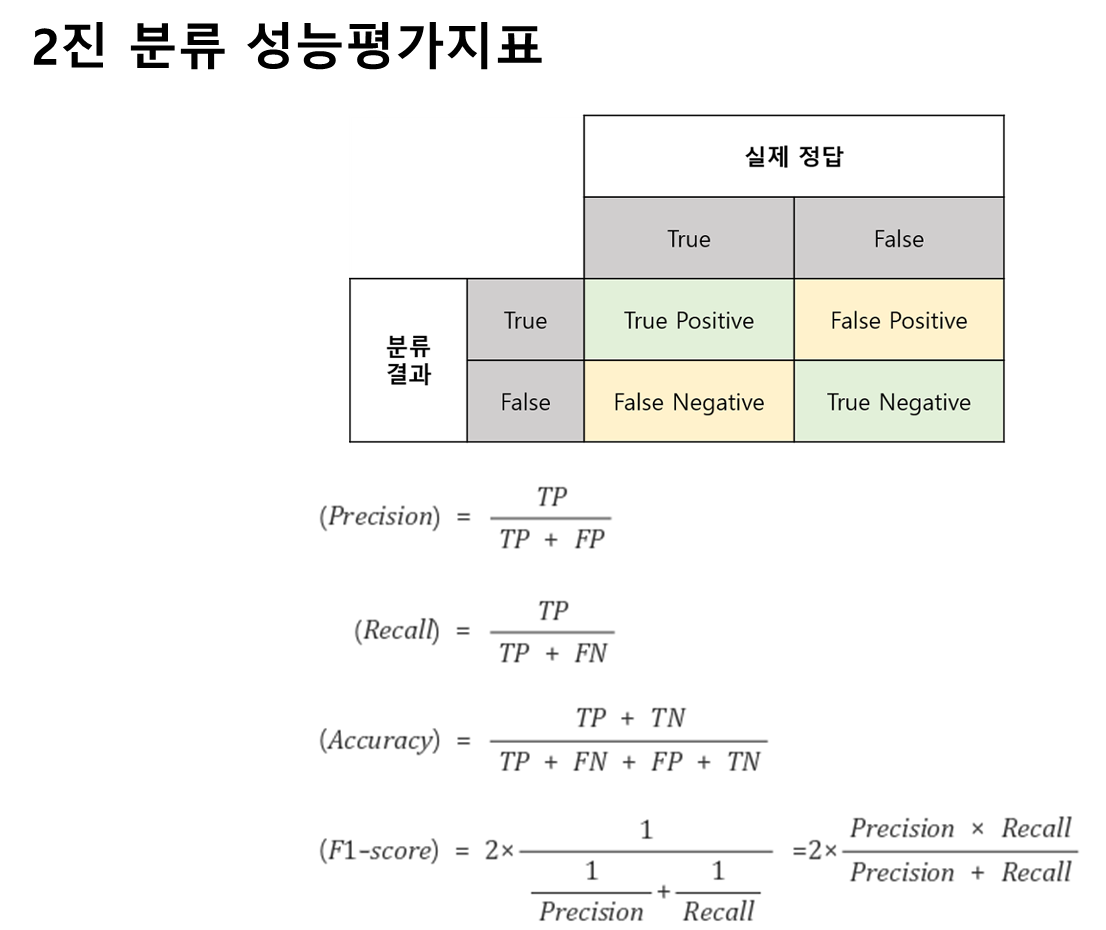

In [ ]:

#%%
""" 이진분류 성능평가 지표"""
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x,y)

y_pred = tree_clf.predict(x)

n = np.concatenate((y,  y_pred.reshape([y_pred.shape[0],1])), axis=1)

print("Confusition matrix: \n{}".format(confusion_matrix(y,y_pred)))
print("precision_score: {}".format( precision_score(y,y_pred)))
print("recall_score: {}".format( recall_score(y,y_pred)))
print("accuracy_score: {}".format( accuracy_score(y,y_pred)))
print("F1 Score: {}".format( f1_score(y,y_pred)))

In [ ]:
# prompt: tree_clf의 ROC 커브를 표시해주고 AUC 의 면적을 색칠하고, ROC 커브의 의미를 적어줘

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#%%
""" 이진분류 성능평가 지표"""


tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x,y)

y_pred = tree_clf.predict(x)

n = np.concatenate((y,  y_pred.reshape([y_pred.shape[0],1])), axis=1)

print("Confusition matrix: \n{}".format(confusion_matrix(y,y_pred)))
print("precision_score: {}".format( precision_score(y,y_pred)))
print("recall_score: {}".format( recall_score(y,y_pred)))
print("accuracy_score: {}".format( accuracy_score(y,y_pred)))
print("F1 Score: {}".format( f1_score(y,y_pred)))

fpr, tpr, thresholds = roc_curve(y, tree_clf.predict_proba(x)[:, 1])
fpr, tpr, thresholds

plt.plot(fpr, tpr, 'o-', label="")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
# plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR(Recall)')
plt.title('Dtree ROC Curve')

# AUC 면적 색칠
auc_score = roc_auc_score(y, tree_clf.predict_proba(x)[:,1])
plt.fill_between(fpr, tpr, alpha=0.5)

plt.text(0.6, 0.2, f'AUC: {auc_score:.2f}')
plt.show()

print('AUC : ' + str(auc_score))

# ROC 커브의 의미
print("ROC 커브는 다양한 분류 임계값에서 모델의 성능을 시각화한 그래프입니다.")
print("x축은 False Positive Rate (FPR)이고, y축은 True Positive Rate (TPR)입니다.")
print("FPR은 실제 Negative인 샘플을 Positive로 잘못 분류한 비율이고, TPR은 실제 Positive인 샘플을 Positive로 제대로 분류한 비율입니다.")
print("즉, ROC 커브는 모델이 Negative와 Positive를 얼마나 잘 구분하는지를 나타냅니다.")
print("AUC (Area Under the Curve)는 ROC 커브 아래의 면적을 나타내며, 모델의 분류 성능을 나타냅니다.")
print("AUC가 1에 가까울수록 모델의 성능이 좋다는 것을 의미합니다.")


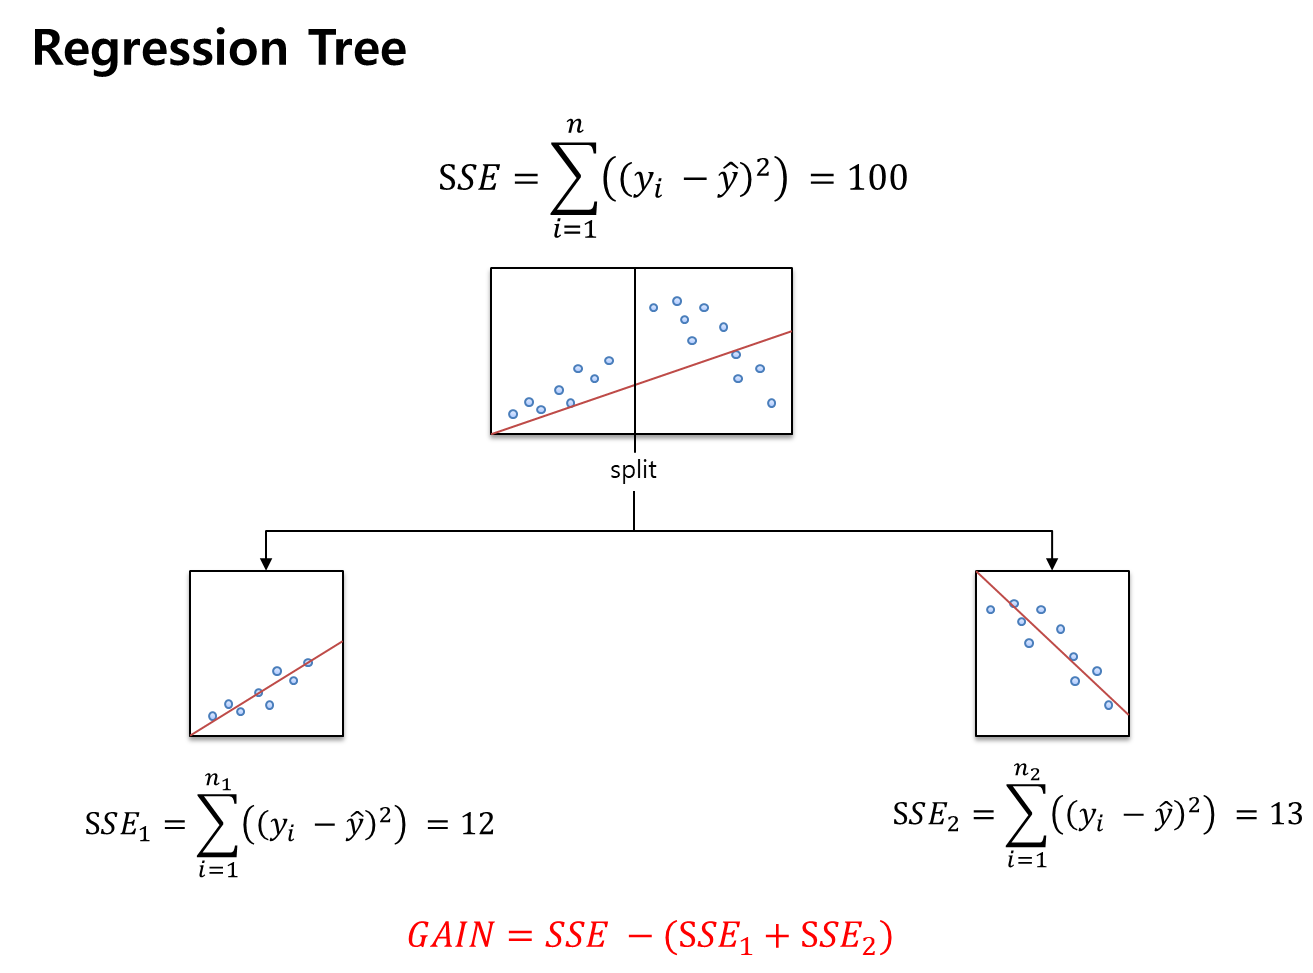

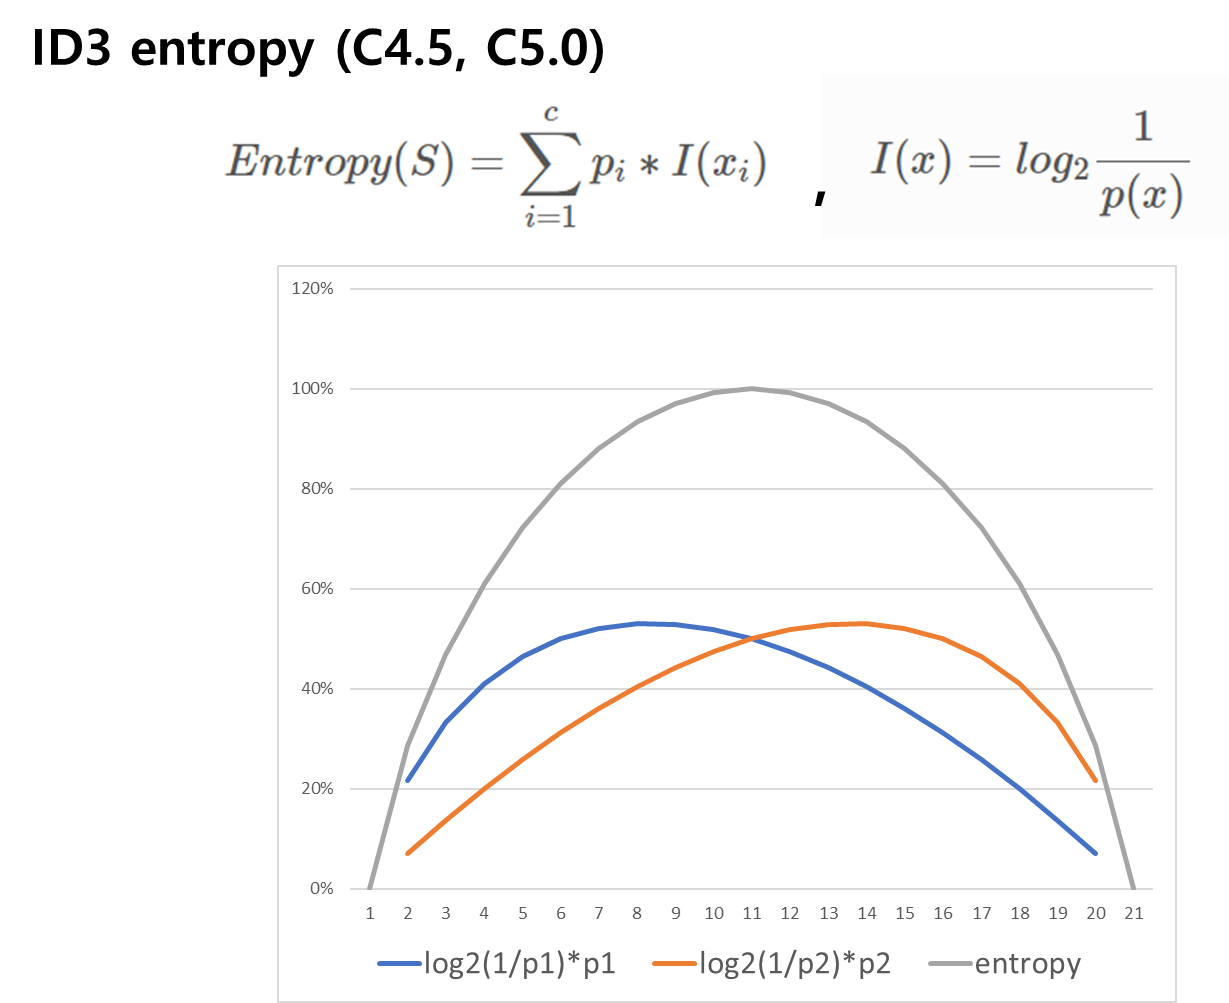

In [ ]:
"""학습을 위하 pandas를 numpy로 변환하여 x와 y 배열 생성"""
x_cols = ['남성 총인구', '여성 총인구', '전체 0대', '전체 10대', '전체 20대', '전체 30대',
       '전체 40대', '전체 50대', '전체 60대', '전체 70대', '전체 80대', '전체 90대',
       '전체 100세 이상', '남성 0대', '남성 10대', '남성 20대', '남성 30대', '남성 40대',
       '남성 50대', '남성 60대', '남성 70대', '남성 80대', '남성 90대', '남성 100세 이상',
       '여성 0대', '여성 10대', '여성 20대', '여성 30대', '여성 40대', '여성 50대',
       '여성 60대', '여성 70대', '여성 80대', '여성 90대', '여성 100세 이상']
x = np.array(data[x_cols].values)
y = np.array(data['인구증감'].values)
y = y.reshape(y.shape[0], 1) #x배열과 shape를 같게 reshape

print(x.shape)
print(y.shape)

In [ ]:

tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(x,y)

score_tr = tree_clf.score(x, y)


dt_dot_data  = export_graphviz(tree_clf,
                               feature_names=x_cols,
                               class_names=['감소', '증가'],         # 종속변수
                               rounded = True,
                               filled = True)

graph = Source(dt_dot_data)
display(graph)

In [ ]:

"""변수중요도"""
feature_imp = tree_clf.feature_importances_
n_feature = len(x_cols)
idx = np.arange(n_feature)

plt.figure(figsize=(5, int(n_feature /3)))
plt.barh(idx, feature_imp, align='center')
plt.yticks(idx, x_cols)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
for i, fi in zip(idx, feature_imp):
    plt.text(0.5, i,'%s' %fi, va='center', ha='center')
plt.show()

In [ ]:
# prompt: tree_clf의 ROC 커브를 표시해주고 AUC 의 면적을 색칠하고, ROC 커브의 의미를 적어줘

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#%%
""" 이진분류 성능평가 지표"""
y_pred = tree_clf.predict(x)

n = np.concatenate((y,  y_pred.reshape([y_pred.shape[0],1])), axis=1)

print("Confusition matrix: \n{}".format(confusion_matrix(y,y_pred)))
print("precision_score: {}".format( precision_score(y,y_pred)))
print("recall_score: {}".format( recall_score(y,y_pred)))
print("accuracy_score: {}".format( accuracy_score(y,y_pred)))
print("F1 Score: {}".format( f1_score(y,y_pred)))

fpr, tpr, thresholds = roc_curve(y, tree_clf.predict_proba(x)[:, 1])
fpr, tpr, thresholds

plt.plot(fpr, tpr, 'o-', label="")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
# plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR(Recall)')
plt.title('Dtree ROC Curve')

# AUC 면적 색칠
auc_score = roc_auc_score(y, tree_clf.predict_proba(x)[:,1])
plt.fill_between(fpr, tpr, alpha=0.5)

plt.text(0.6, 0.2, f'AUC: {auc_score:.2f}')
plt.show()

print('AUC : ' + str(auc_score))

